### 데이터 불러오기

In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
#데이터 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 데이터 분석하기

#### 필수 문제 : 월별 매출액 추세

In [7]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [8]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액']=temp_var['결제금액'].str.replace(',', '')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype('int')

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date').sum().drop(['판매수량'], axis=1)

In [10]:
payment_data

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


Text(0.5, 1.0, 'Sales By Months')

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_te

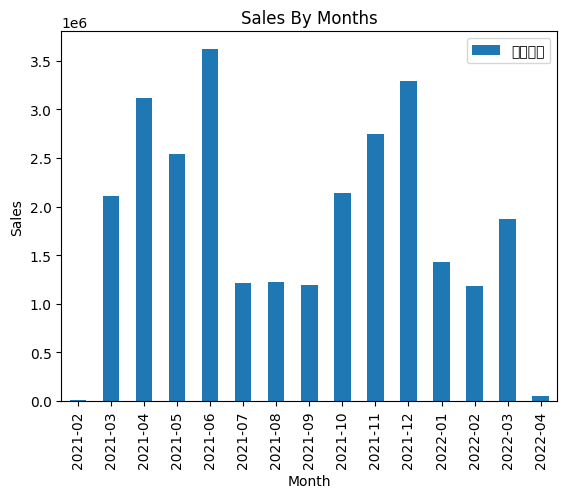

In [11]:
payment_data.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales By Months')

#### 가장 인기 있는 음식/음료

In [12]:
temp_var = sales_data
dlt = temp_var[temp_var['판매수량']==-1].index
temp_var = temp_var.drop(dlt, axis=0)
dlt_temp_var = temp_var['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
df_temp_var = pd.DataFrame(dlt_temp_var)
items_count = df_temp_var.head(10)

In [13]:
items_count

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [14]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


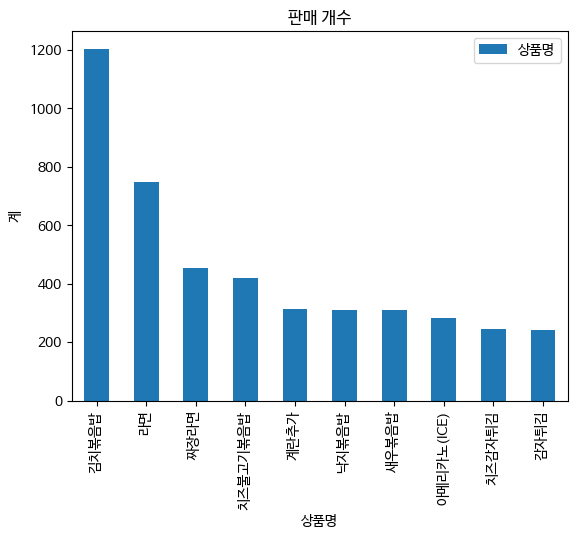

In [15]:
# 집계 결과를 시각화하기
items_count.plot(kind='bar')
plt.xlabel('상품명')
plt.ylabel('계')
plt.title('판매 개수')
plt.show()

In [16]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
dlt_temp_var = temp_var.groupby('상품명').sum().drop(['판매수량'],axis=1)

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = dlt_temp_var.sort_values('결제금액', ascending=False)

In [17]:
items_payment

,결제금액
상품명,
김치볶음밥,6004400
라면,2941500
치즈불고기볶음밥,2292600
짜장라면,2038500
낙지볶음밥,1710700
...,...
비엔나소세지(토핑),3000
(밥)계란후라이 추가,3000
이어폰(커널형),3000


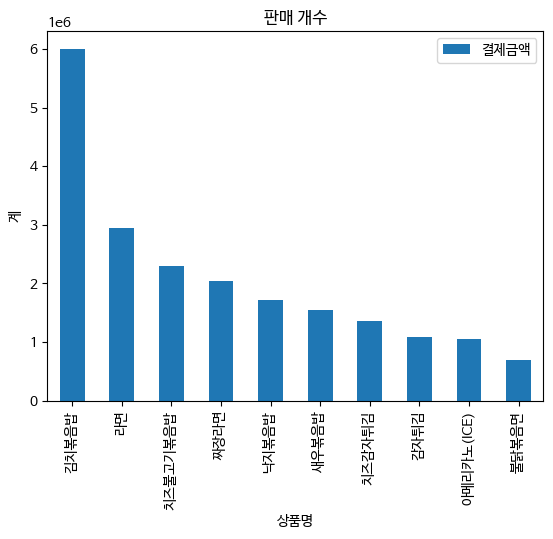

In [18]:
# 집계 결과 시각화하기
items_payment.head(10).plot(kind='bar')
plt.xlabel('상품명')
plt.ylabel('계')
plt.title('판매 개수')
plt.show()

#### 필수 문제 : 가장 많이 팔린 입장권 종류

In [19]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

# temp_var의 금액을 요금제명을 기준으로 집계하기
temp_var = temp_var.groupby('요금제명').sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
temp_var = temp_var.sort_values('금액', ascending=False)

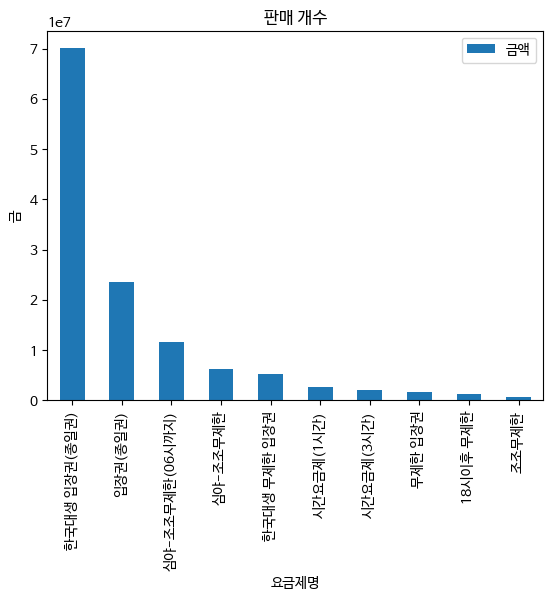

In [20]:
# 집계 결과 시각화하기
temp_var.head(10).plot(kind='bar')
plt.xlabel('요금제명')
plt.ylabel('금')
plt.title('판매 개수')
plt.show()

### 내가 정의한 문제 해결하기

#### 환불한 메뉴는 무엇이고, 메뉴별 환불 금액은 얼마일까?

In [21]:
#환불한 메뉴를 temp_var 변수에 지정하기
temp_var = sales_data
temp_var = temp_var[temp_var['판매수량']==-1]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
22,2022-03-31 11:31,카운터,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
28,2022-03-31 11:13,카운터,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
89,2022-03-26 20:17,선불기1,아메리카노(ICE),신용카드,판매취소,-1,-4400,NaN,2022-03
91,2022-03-26 20:16,선불기1,아메리카노(HOT),신용카드,판매취소,-1,-3900,NaN,2022-03
92,2022-03-26 20:16,선불기1,크로플,신용카드,판매취소,-1,-5500,NaN,2022-03
...,...,...,...,...,...,...,...,...,...
7092,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7093,2021-02-17 14:21,카운터,카페라떼(HOT),현금,결제취소,-1,-4000,NaN,2021-02
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02


In [25]:
# 환불을 진행한 상품의 종류를 알아보자
# 결제금액의 특수문자를 제거하고 int형으로 바꾸자
temp_var['결제금액'] = temp_var['결제금액'].astype(str)
temp_var['결제금액']=temp_var['결제금액'].str.replace(',', '')
temp_var['결제금액']=temp_var['결제금액'].str.replace('-', '')
temp_var['결제금액'] = temp_var['결제금액'].astype(int)

# 환불한 상품 종류별 개수를 알아보자
item_count = temp_var.groupby('상품명').sum()
item_count['판매수량'] = item_count['판매수량'].astype(str)
item_count['판매수량'] = item_count['판매수량'].str.replace('-','')
item_count['판매수량'] = item_count['판매수량'].astype(int)


/tmp/ipykernel_56/909730871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_var['결제금액'] = temp_var['결제금액'].astype(str)
/tmp/ipykernel_56/909730871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_var['결제금액']=temp_var['결제금액'].str.replace(',', '')
/tmp/ipykernel_56/909730871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [28]:
item_count.head()

,판매수량,결제금액
상품명,,
2인라면,5,500
계란추가,1,500
김치볶음밥,7,32500
낙지볶음밥,2,11000
녹차라떼(HOT),1,4500


In [29]:
#환불 상품의 개수 상위 10개 뽑아내기
items_count = item_count.sort_values('판매수량', ascending=False).drop('결제금액', axis=1)

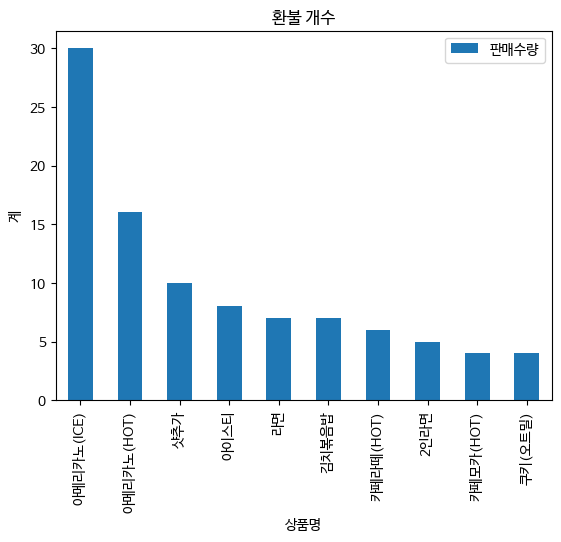

In [30]:
# 상위 10개 plot하기
items_count.head(10).plot(kind='bar')
plt.xlabel('상품명')
plt.ylabel('계')
plt.title('환불 개수')
plt.show()

In [31]:
# 환불 금액에 따른 상위 10개 뽑아내기
cost = item_count.sort_values('결제금액', ascending=False).drop('판매수량', axis=1)
cost

,결제금액
상품명,
아메리카노(ICE),122000
아메리카노(HOT),56400
김치볶음밥,32500
아이스티,28000
라면,25500
카페라떼(HOT),24000
초코라떼(ICE),18000
카페모카(HOT),18000
치즈불고기볶음밥,16500


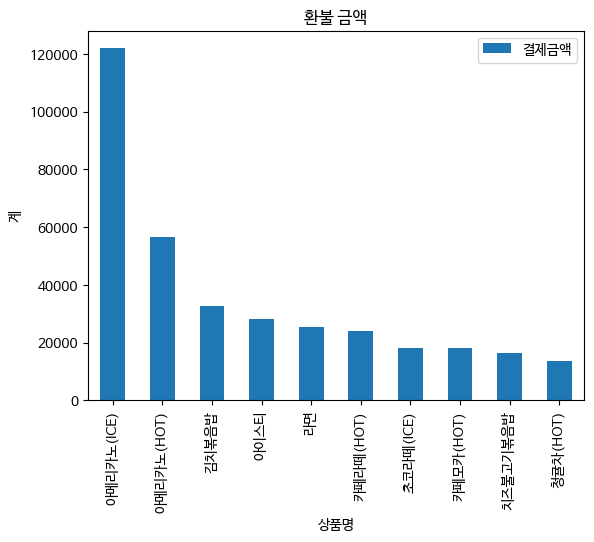

In [32]:
cost.head(10).plot(kind='bar')
plt.xlabel('상품명')
plt.ylabel('계')
plt.title('환불 금액')
plt.show()

이번 Project에는 데이터를 보고 데이터에 맞고, 내가 원하는 주제를 선정하였다.
그리고 그에 맞는 EDA를 할 수 있도록 하였다.